# Analiza statystyczna - tutorial 
## Wstęp
Przed rozpoczęciem prac nad modelami/ analizami warto poznać dane, na których będziemy pracować. 
W tym celu wykonujemy analizy statystyczne opisujące nam dane.

<div class="alert alert-block alert-success">
<b>Cel</b> 
Celem analizy statystycznej jest pozyskanie jak największej wiedzy z danych
</div>


In [1]:
# importy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import normaltest, anderson

Pobranie danych 

Pobieramy przykładowy dataset z biblioteki Scikit-Learn 

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing(as_frame = True)['frame']

Odczytajmy informację o tych danych

In [4]:
print(fetch_california_housing(as_frame = True)['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Pierwsze spojrzenie na dane

<div class="alert alert-block alert-success">
<b>Cel</b> 

Celem poniższego zadania jest analiza statystyczna danych *fetch_california_housing* przed tworzeniem modelu regresyjnego, w którym celem (zmienną objaśnianą) będzie wyznaczenie Mediany wartości domu (**MedHouseVal**)
    
</div>

### Ogólna wiedza o danych

Przy pierwszym spojrzeniu na dane warto sprawdzić jaka jest średnia, mediana, wartosci minimalne i maksymalne. Najprostszy sposób, aby to zbadać to wykorzystać metodę *describe()*. Przedstawia ona liczbę danych, średnią, odchylenie standardowe, minimalną wartość, maksymalną wartośc, mediane oraz 25 i 75 percentyl

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Wsyztskie te informacje można oczywiście wydobyć osobnymi metodami:

**Liczba wierszy:**
- dla wszystkich kolulumn <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">*pd.DataFrame.count()*</a>
- dla pojedynczej kolumny <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.count.html>*pd.Series.count()*</a>

In [7]:
df.count()

MedInc         20640
HouseAge       20640
AveRooms       20640
AveBedrms      20640
Population     20640
AveOccup       20640
Latitude       20640
Longitude      20640
MedHouseVal    20640
dtype: int64

In [8]:
df['MedHouseVal'].count()

20640

**Średnia:**
- dla wszytskich kolulumn <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html>*pd.DataFrame.mean()*</a>
- dla pojedynczej kolumny <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html>*pd.Series.mean()*</a>

In [9]:
df.mean()

MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

In [10]:
df['MedHouseVal'].mean()

2.068558169089147

**Odchylenie standardowe:**
- dla wszytskich kolulumn <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html">*pd.DataFrame.std()*</a>
- dla pojedynczej kolumny <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.std.html>*pd.Series.std()*</a> 

In [11]:
df.std()

MedInc            1.899822
HouseAge         12.585558
AveRooms          2.474173
AveBedrms         0.473911
Population     1132.462122
AveOccup         10.386050
Latitude          2.135952
Longitude         2.003532
MedHouseVal       1.153956
dtype: float64

In [12]:
df['MedHouseVal'].std()

1.1539561587441387

**Wartość minimalna:**
- dla wszytskich kolulumn <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html">*pd.DataFrame.min()*</a>
- dla pojedynczej kolumny <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html>*pd.Series.min()*</a> 

In [13]:
df.min()

MedInc           0.499900
HouseAge         1.000000
AveRooms         0.846154
AveBedrms        0.333333
Population       3.000000
AveOccup         0.692308
Latitude        32.540000
Longitude     -124.350000
MedHouseVal      0.149990
dtype: float64

In [14]:
df['MedHouseVal'].min()

0.14999

**Wartość maksymalna:**
- dla wszystkich kolulumn <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html">*pd.DataFrame.max()*</a>
- dla pojedynczej kolumny <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html>*pd.Series.max()*</a> 

In [15]:
df.max()

MedInc            15.000100
HouseAge          52.000000
AveRooms         141.909091
AveBedrms         34.066667
Population     35682.000000
AveOccup        1243.333333
Latitude          41.950000
Longitude       -114.310000
MedHouseVal        5.000010
dtype: float64

In [16]:
df['MedHouseVal'].max()

5.00001

**Percentyle:**
- dla wszystkich kolulumn <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html>*pd.DataFrame.quantile()*</a>
- dla pojedynczej kolumny <a href = https://numpy.org/doc/stable/reference/generated/numpy.quantile.html>*np.quantile()*</a>, lub <a href = https://numpy.org/doc/stable/reference/generated/numpy.percentile.html> *np.percentile()* </a>

In [17]:
df.quantile([0.25, 0.50, 0.75])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0.25,2.56340,18.0,4.440716,1.006079,787.0,2.429741,33.93,-121.80,1.19600
0.50,3.53480,29.0,5.229129,1.048780,1166.0,2.818116,34.26,-118.49,1.79700
0.75,4.74325,37.0,6.052381,1.099526,1725.0,3.282261,37.71,-118.01,2.64725


In [18]:
np.quantile(df['MedHouseVal'], [0.25,0.50,0.75])

array([1.196  , 1.797  , 2.64725])

In [19]:
np.percentile(df['MedHouseVal'], [25,50,75])

array([1.196  , 1.797  , 2.64725])

In [20]:
np.percentile(df['MedHouseVal'], 25)

1.196

In [21]:
np.quantile(df['MedHouseVal'], 0.25)

1.196

Mamy już pewną ogólną wiedze na temat naszych danych. Przyjżyjmy się teraz poszczególnym kolumnom i sprawdźmy jak rozkładają się  w nich dane

### Analiza poszczególnych kolumn

W pierwszej kolejności sprawdźmy jak wyglada nasz cel, a więc mediana wartości domu

Poniważ wartość mieszkania może przyjmować wszystkie wartości większe od 0, najlepszym sposobem na sprawdzenie rozkładu jest stworzenie histogramu

Najprostszą metodą jest wygenerowanie automatycznego histogramy za pomocą metody <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.hist.html> *pd.Series.hist()* </a>, lub z pakietu matplotlib <a href = https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html> *plt.hist()* </a>

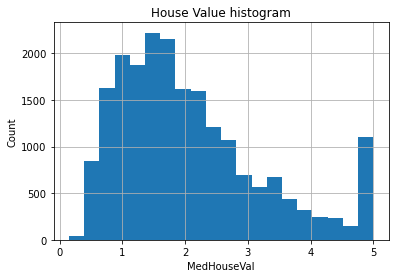

In [22]:
df['MedHouseVal'].hist(bins = 20)
plt.xlabel('MedHouseVal')
plt.ylabel('Count')
plt.title('House Value histogram')
plt.show()

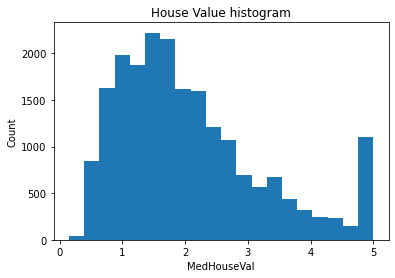

In [23]:
plt.hist(df['MedHouseVal'], bins = 20)
plt.xlabel('MedHouseVal')
plt.ylabel('Count')
plt.title('House Value histogram')
plt.show()

Najwięcej przypadków znajduje się w przedziale 1-2. Dodatkowo rozkład nie przypomina standardowego <a href = https://en.wikipedia.org/wiki/Normal_distribution> rozkładu normalnego </a>. W kolejnych częściach dowiemy się jak sprawdzić czy dane układają się w rozkład normalny, czy nie.

**Wartości dyskretne**

Jeżeli w kolumnie znajdują się wartości dyskretne, warto znać ilość poszczególnych wartości.
W tym celu można wykorzystać funkcję <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>*pd.Series.count_values()*</a>.

Sprawdżmy jak często występują poszczególne mediany wieku domów w danych obszarach:

In [24]:
df['HouseAge'].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: HouseAge, dtype: int64

Otrzymane wyniki są automatycznie ustawiane od przypadków najczęściej do najrzadziej występujacych. 

Występuje 1273 obszarów z medianą wieku domów równą 52 lata. Co ciekawe mediana równa 51 lat występuje tylko w 48 obszarach. Najmniej, bo tylko 4 obszary, mają medianę wieku domów w wysokości 1 roku.

Sprawdźmy jak wyglądają takie dane na wykresie

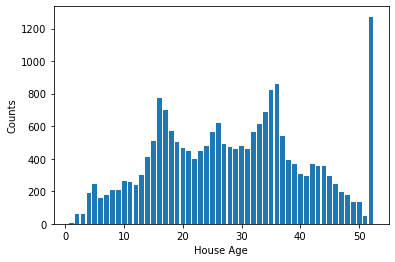

In [25]:
from matplotlib import pyplot as plt

df_plot = df['HouseAge'].value_counts().reset_index().sort_values( 'index')
#df_plot['index']
plt.bar(x = 'index', height = 'HouseAge', data = df_plot)
plt.xlabel('House Age')
plt.ylabel('Counts')
plt.show()

Widać, że zdecydowanie 52 lata to najczęściej występująca mediana wieku domów. Widać także zwiększenie ilości danych w środkowych przedziale lat.

Po wyglądzie można się zastanowić czy ta wartość 52 lata nie jest maksymalną wartością, która mogła zostać wpisana. Należy się zastanowić czy nie warto usunąć tych danych do dalszej analizy. Niestety w źródle danych nie ma informacji na ten temat, ale w rzeczywistych warunkach taka informacja powinna być opisana.

## Badanie korelacji

W analizie statystycznej ważnym elementem jest badanie korelacji zmiennych. To dzięki niej wiemy czy występuje jakaś zależność pomiędzy zbiorami danych. 

Bardzo istotne jest zbadanie korelacji podczas budowania modelu regresyjnego. Badając korelację naszego celu (w tym przykładzie 'MedHouseVal') z cechami, możemy dowiedzieć się która z cech jest naistotniejsza, a która nie pomoże nam w stworzeniu odpowiedniego modelu

Najczęściej badanymi korelacjami są:
 - <a href = https://en.wikipedia.org/wiki/Pearson_correlation_coefficient> **Pearsona** </a> - bada zależność liniową w danych X i Y
 
 $$
r_{p}= \frac{cov(X,Y)}{\sigma_X \sigma_Y}
$$

 - <a href = https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient> **Spearmana** </a> - bada zależność rank danych X i Y. Wysoka wartość współczynnika korelacji nie oznacza, że dane są liniowo skorelowane, ale wraz z wzrostem wartosci X, zwiększają się wartości Y, jednak niekoniecznie zawsze o taką samą wartość
 
 $$
 r_s = \frac{cov(R(X)R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}}
 $$
 
*gdzie*:
 
 $cov()$ - kowariancja, 
 
 $\sigma$ - odchylenie standardowe
 
 $R()$ - rangi danych
 


Najprostrzym sposobem na zbadanie korelacji w tabeli jest wykorzystanie metody <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html> *pd.DataFrame.corr()* </a>

Metoda stworzy macież korelacji pomiędzy wszystkimi kolumnami numerycznymi w DataFrame

In [26]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Jeżeli chcielibyśmy wyliczyć korelację Spearmana wystarczy dodać parametr ***method = 'spearman'***

In [27]:
df.corr(method = 'spearman')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.147308,0.643671,-0.252426,0.006268,-0.044171,-0.088029,-0.009928,0.676778
HouseAge,-0.147308,1.000000,-0.231409,-0.120981,-0.283879,-0.024833,0.032440,-0.150752,0.074855
AveRooms,0.643671,-0.231409,1.000000,0.082046,-0.105385,0.018807,0.127134,-0.044783,0.263367
AveBedrms,-0.252426,-0.120981,0.082046,1.000000,0.027027,-0.132315,0.047197,0.010884,-0.125187
Population,0.006268,-0.283879,-0.105385,0.027027,1.000000,0.242337,-0.123626,0.123527,0.003839
AveOccup,-0.044171,-0.024833,0.018807,-0.132315,0.242337,1.000000,-0.150954,0.181468,-0.256594
Latitude,-0.088029,0.032440,0.127134,0.047197,-0.123626,-0.150954,1.000000,-0.879203,-0.165739
Longitude,-0.009928,-0.150752,-0.044783,0.010884,0.123527,0.181468,-0.879203,1.000000,-0.069667
MedHouseVal,0.676778,0.074855,0.263367,-0.125187,0.003839,-0.256594,-0.165739,-0.069667,1.000000


Z obu korelacji wynika, że najlepiej skorelowaną cechą z ceną domu (zmienną objaśniana) jest wysokość zarobków (zmienna objaśniająca). Przy budowie modelu regresyjnego, to ta cecha będzie jedną z najistotniejszych. To ona najlepiej swoimi wielkościami opisuje cenę domu.

Skoro znamy najlepszą zmienną objaśniajacą, spójrzmy na wykres punktowy tych dwóch zmiennych.

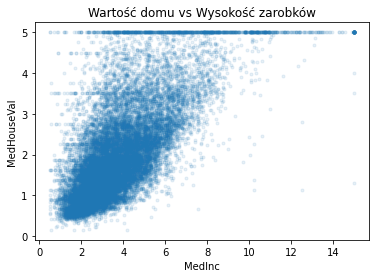

In [28]:
plt.plot(df['MedInc'], df['MedHouseVal'],  linestyle = '', marker = '.', alpha = 0.1) 
# parametr alpha wykorzystywany jest do ustawienia przejrzystosci punktów. 
# Im ciemniejszy obszar na wykresie tym więcej punktów się tam znajduje
plt.ylabel('MedHouseVal')
plt.xlabel('MedInc')
plt.title('Wartość domu vs Wysokość zarobków')
plt.show()


Na wykresie widać tendencję zwiększania się wartości domów przy zwiększajacych się zarobkach.

Korelacji nie musimy liczyć dla wszystkich kolumn w tabeli. Możemy ją takze zmierzyć tylko dla dwóch wybranych kolumn. 
Służą do tego metody:
- <a href= https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html> np.corrcoef()</a> (korelacja Pearsona)
- <a href = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html> scipy.stats.pearsonr()</a> (korelacja Pearsona)
- <a href = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html> scipy.stats.spearmanr()</a> (korelacja Spearmana)

In [29]:
np.corrcoef(df['MedHouseVal'], df['MedInc'])

array([[1.        , 0.68807521],
       [0.68807521, 1.        ]])

In [30]:
from scipy.stats import pearsonr

pearsonr(df['MedHouseVal'], df['MedInc'])

(0.6880752079585443, 0.0)

In [31]:
from scipy.stats import spearmanr

spearmanr(df['MedHouseVal'], df['MedInc'])

SpearmanrResult(correlation=0.6767781095942506, pvalue=0.0)

Zwróćmy uwagę, że metody z biblioteki *scipy* zwracają dwie wartości. Pierwsza jest to współczynnik korelacji, a druga to ***P-value***, której teraz dokładnie się przyjrzymy 

## Testy statystyczne

<div class="alert alert-block alert-success">
   <b> Definicje </b>
    
**Test statystyczny** – formuła matematyczna pozwalająca oszacować prawdopodobieństwo spełnienia pewnej hipotezy statystycznej w populacji na podstawie próby losowej z tej populacji.
    
$\newline$

**Hipoteza statystyczna** - dowolne przypuszczenie co do rozkładu populacji

$\newline$

**Hipoteza zerowa** $H_0$ - Przypuszczenie, które chcemy sprawdzić za pomocą testów statystycznych. 

*Przykład:* w metodzie *pearsonr* hipotezą zerową jest założenie, że nie istnieje korelacja pomiędzy zbiorami danych
$\newline$   

**P-value** - prawdopodobieństwo kumulatywne wylosowania próby takiej lub bardziej skrajnej jak zaobserwowana, przy założeniu, że hipoteza zerowa jest prawdziwa
    
*Przykład:* W korelacji pomiędzy wartoscią domu, a zarobkami P-value wynosi 0. Możemy więc stwierdzić, że nie istnieje możliwość wylosowania takiej próby, aby korelacja była wyższa lub taka sama z jednoczesnym założeniem, że korelacja ta nie istnieje.
    
</div>

<div class="alert alert-block alert-warning">
    Przy wykorzystywaniu testów statystycznych ustala się pewien próg (<b>poziom istotności</b> $\alpha$ ). Jeżeli P-value jest mniejsze niż ten poziom można odrzucić hipotezę zerową. Zazwyczaj $\alpha$ = 0.05
    
*Przykład* W korelacji pomiędzy wartoscią domu, a zarobkami P-value < 0.05, więc odrzucamy hipotezę zerową.
</div>

<div class="alert alert-block alert-info">
    
Za pomocą P-value oraz poziomu istotności możemy odrzucić hipotezę zerową. Jednak, nie oznacza to, że potwierdzamy hipotezę alternatywną ($H_1$). 
</div>

Za pomocą testów statystycznych możemy także sprawdzić czy dane posiadają konkretny rozkład.
 
Sprawdźmy więc, czy ceny domów posiadaja rozkład normalny. Możemy to zrobić za pomocą metody <a href = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html> *scipy.stats.normaltest()* </a>

Hipotezą zerową w tej metodzie jest załozenie, że dane mają rozkład normalny.

Przyjmijmy poziom istotności $\alpha$ = 0.05. 
Jeżeli P-value < 0.05 Będziemy mogli odrzucić tą hipotezę i powiedzieć, że cena domów nie posiada rozkładu normalnego

In [32]:
normaltest(df['MedHouseVal'])

NormaltestResult(statistic=2430.931051066072, pvalue=0.0)

P-value = 0, a więc odrzucamy hipotezę, że dane posiadają rozkład normalny


Sprawdźmy co by jednak było, gdyby dane faktycznie były z rozkładu normalnego.

Wylosujmy 10 000 próbek z rozkładu normalnego


In [33]:
np.random.seed(42) #pozwala na wylosowanie zawsze tych samych danych
norm = [np.random.normal() for i in range(100000)]

Spójrzmy na histogram 

(array([4.0000e+00, 1.4000e+01, 6.8000e+01, 2.7800e+02, 9.2800e+02,
        2.4550e+03, 5.3400e+03, 9.6380e+03, 1.4271e+04, 1.7163e+04,
        1.7333e+04, 1.4015e+04, 9.5850e+03, 5.2420e+03, 2.4380e+03,
        8.8000e+02, 2.6800e+02, 6.2000e+01, 1.7000e+01, 1.0000e+00]),
 array([-4.46560386, -4.01836946, -3.57113505, -3.12390065, -2.67666624,
        -2.22943183, -1.78219743, -1.33496302, -0.88772862, -0.44049421,
         0.00674019,  0.4539746 ,  0.90120901,  1.34844341,  1.79567782,
         2.24291222,  2.69014663,  3.13738103,  3.58461544,  4.03184985,
         4.47908425]),
 <BarContainer object of 20 artists>)

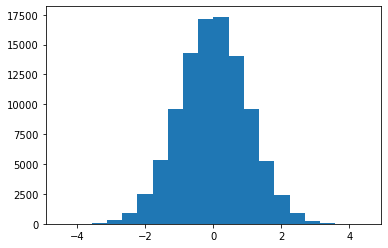

In [34]:
plt.hist(norm, bins = 20)

A teraz sprawdźmy, czy za pomocą testu statystycznego możemy stwierdzić, że rozkład jest normalny

In [35]:
normaltest(norm)

NormaltestResult(statistic=0.31105797316869505, pvalue=0.8559622651469295)

P-value > 0.05, a więc nie możemy odrzucić hipotezy zerowej. Nie oznacza, to że rozkład musi być normalny, jednak jest to możliwe 

Sprawdźmy czy cena domu posiada inny rozkład.

Metoda, która pozwala sprawdzić inne często występujące rozkłady to <a href = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html> *scipy.stats.anderson()* </a>

Za jej pomocą możemy sprawdzić takie rozkłady jak:
- norm - rozkład normalny
- expon - rozkład wykładniczy
- logistic - rozkład logistyczny
- gumbel - rozkład Gumbela


In [36]:
for test in ['norm', 'expon', 'logistic', 'gumbel']:
    print('Sprawdzamy czy rozkład jest ', test)
    print( anderson(df['MedHouseVal'], dist = test))
    

Sprawdzamy czy rozkład jest  norm
AndersonResult(statistic=501.7692781709593, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Sprawdzamy czy rozkład jest  expon
AndersonResult(statistic=1999.7321503644089, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Sprawdzamy czy rozkład jest  logistic
AndersonResult(statistic=346.8528191385558, critical_values=array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]))
Sprawdzamy czy rozkład jest  gumbel
AndersonResult(statistic=1156.3864507171638, critical_values=array([0.473, 0.636, 0.756, 0.876, 1.037]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))


W dokumentacji danej metody można wyczytać, że jeżeli wartość testu (*statistic*) jest większa od wartości krytycznych (*critical_values*) to dane nie należą do testowanego rozkładu, co oznacza, że rozkład ceny domow nie należy do żadnego z wyżej wymienonych.

W bibliotece *scipy.stats* można znaleść inne testy statystyczne.